In [1]:
!pip install tensorflow

In [48]:
#Bibliotecas

import pandas as pd
from sklearn.model_selection import train_test_split #Faz uma divisão aleatória dos dados 
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
df.shape #(Qt linhas , Qt colunas)

(891, 12)

In [29]:
df.info() #informa o tipo de dado de cada coluna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
df.describe() 

#count: conta o numero de valores não nulos preenchidos na coluna. Bom para verificar se tem dados faltando

#mean: Média aritmética .

#std : Desvio padrão. Espalhamento dos dados em torno da média.

# min: menor valor encontrado na coluna

#max : maior valor encontrado na coluna

#25% : primeiro quartil. 25% dos dados são menores ou iguais a isso
#50% : Mediana. Metade dos dados abaixo, metade acima.
#75% : 75% dos seus dados são menores ou iguais a esse valor


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
df.isnull().sum() 

#ver quantos dados faltam em determinadas colunas 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
print(df['Embarked'].unique())

['S' 'C' 'Q' nan]


In [33]:
#Como Embarked tem dados não numericos. vamos preencher os dados usando sua moda.Essa é a forma mais precisa

moda_Embarked = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(moda_Embarked)

In [34]:
#Fazendo o debug para ver se o preenchimento funcionou Embarked
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [35]:
#Na idade a forma mais segura de preencher esses 177 dados faltantes é usar a mediana.

mediana_idade = df['Age'].median()
df['Age'] = df['Age'].fillna(mediana_idade)

In [36]:
#fazendo debug para ver o preenchimento de Age funcionou
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [37]:
#Agora vamos para Cabin. Tem 687 dados faltando.
#Vamos ver como são esses dados:
print(df['Cabin'].unique())

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


In [38]:
# 1. Só cria 'Has_Cabin' se a coluna 'Cabin' ainda existir
if 'Cabin' in df.columns:
    df['Has_Cabin'] = df['Cabin'].apply(lambda x: 0 if pd.isnull(x) else 1)

# 2. Só cria 'FamilySize' se as originais existirem
if 'SibSp' in df.columns and 'Parch' in df.columns:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# 3. Só cria 'IsAlone' se 'FamilySize' existir
if 'FamilySize' in df.columns:
    df['IsAlone'] = df['FamilySize'].apply(lambda x: 1 if x == 1 else 0)

# 4. Remove apenas as colunas que REALMENTE estão lá
colunas_para_remover = ['PassengerId','Name','Ticket' ,'Cabin','SibSp','Parch']
colunas_presentes = [c for c in colunas_para_remover if c in df.columns]

if colunas_presentes:
    df.drop(colunas_presentes, axis=1, inplace=True)
    print(f"Colunas removidas: {colunas_presentes}")

# 5. Converter categorias (Sex e Embarked)
# O pandas é inteligente: se já converteu, ele não fará nada ou manterá como está
colunas_cat = [c for c in ['Sex', 'Embarked'] if c in df.columns]
if colunas_cat:
    df = pd.get_dummies(df, columns=colunas_cat, drop_first=True)

print("Processamento concluído com sucesso!")



Colunas removidas: ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch']
Processamento concluído com sucesso!


In [39]:
#Vamos ver se funcionou

df.isnull().sum()

Survived      0
Pclass        0
Age           0
Fare          0
Has_Cabin     0
FamilySize    0
IsAlone       0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [40]:
#Dados prontos para uso ! 

In [41]:
# Separando os dados:
X= df.drop('Survived',axis= 1)#Todas as colunas (Features) , menos "Survived"(Queremos "descobrir")
Y = df['Survived'] #Target 

#Dividindo os dados entre treino e teste

X_train , X_test , Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42) 

#Trenamos com 80% dos dados e deixamos 20% para que o modelo teste se aprendeu.

In [42]:
#Vamos padronizar os dados usando a média e desvio padrão de cada elemento da coluna.
scaler = StandardScaler()

#Capturando a média e desvio padrão de cada elemento que está sendo treinadoX_train
X_train_scaled = scaler.fit_transform(X_train)

#Apenas transforma dados de Teste, usando os valores aprendidos no Treino 
X_test_scaled = scaler.transform(X_test)

#Debug:
print("padronização conluída.")


padronização conluída.


In [45]:
#Construção e compilação da rede neural

# Define o número de features de entrada (colunas em X_train_scaled)
input_dim = X_train_scaled.shape[1] 

# ==============================================================================
# CONSTRUÇÃO E COMPILAÇÃO DA REDE NEURAL
# ==============================================================================

model = Sequential([
    # Camada de Entrada/Primeira Camada Oculta: Recebe os dados padronizados
    Dense(units=16, activation='relu', input_shape=(input_dim,)), 
    
    # Camada Oculta: Adiciona profundidade e capacidade de aprendizado
    Dense(units=8, activation='relu'), 
    
    # Camada de Saída: 1 neurônio com Sigmoid para classificação binária (0 ou 1)
    Dense(units=1, activation='sigmoid') 
])

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

print("--- Arquitetura do Modelo ---")
model.summary()

C:\Users\Riquinho\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


--- Arquitetura do Modelo ---


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305 (1.19 KB)

 Trainable params: 305 (1.19 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
# Inicia o treinamento
history = model.fit(
    X_train_scaled,  # Dados de entrada (Features) padronizados
    Y_train,         # Dados de saída (Target)
    epochs=100,      # Quantas vezes o modelo verá o conjunto de treino
    batch_size=32,   # Quantos exemplos o modelo processa por vez antes de atualizar os pesos
    verbose=0        # Roda o treinamento sem mostrar o log de cada época
)

print("Treinamento concluído. O modelo aprendeu com 100 épocas.")

Treinamento concluído. O modelo aprendeu com 100 épocas.


In [47]:
# 1. Avaliação Objetiva
loss, accuracy = model.evaluate(X_test_scaled, Y_test, verbose=0)

# 2. Geração de Previsões (para conferência manual)
# O modelo retorna probabilidades, vamos transformar em 0 ou 1
predictions = (model.predict(X_test_scaled) > 0.5).astype("int32")

print("====================================================")
print(f"📊 RESULTADO FINAL DO MODELO")
print(f"Acurácia no Teste: {accuracy * 100:.2f}%")
print(f"Perda (Loss): {loss:.4f}")
print("====================================================")

# Exibe as 5 primeiras previsões vs Realidade
print("\nExemplo de Previsões (Primeiros 5 passageiros do teste):")
for i in range(5):
    real = "Sobreviveu" if Y_test.values[i] == 1 else "Morreu"
    pred = "Sobreviveu" if predictions[i] == 1 else "Morreu"
    print(f"Passageiro {i+1}: Real: {real} | Modelo: {pred}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
📊 RESULTADO FINAL DO MODELO
Acurácia no Teste: 79.89%
Perda (Loss): 0.4489

Exemplo de Previsões (Primeiros 5 passageiros do teste):
Passageiro 1: Real: Sobreviveu | Modelo: Morreu
Passageiro 2: Real: Morreu | Modelo: Morreu
Passageiro 3: Real: Morreu | Modelo: Morreu
Passageiro 4: Real: Sobreviveu | Modelo: Sobreviveu
Passageiro 5: Real: Sobreviveu | Modelo: Sobreviveu


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
--- Relatório de Classificação ---
              precision    recall  f1-score   support

      Morreu       0.81      0.87      0.83       105
  Sobreviveu       0.79      0.70      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



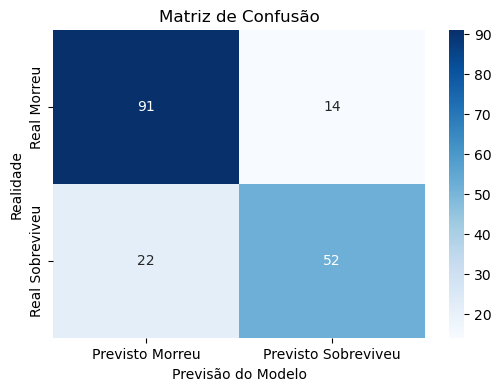

In [49]:
# 1. Obter as previsões do modelo (transformando probabilidade em 0 ou 1)
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# 2. Gerar o Relatório de Classificação
print("--- Relatório de Classificação ---")
print(classification_report(Y_test, y_pred, target_names=['Morreu', 'Sobreviveu']))

# 3. Gerar a Matriz de Confusão Visual
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Previsto Morreu', 'Previsto Sobreviveu'],
            yticklabels=['Real Morreu', 'Real Sobreviveu'])
plt.ylabel('Realidade')
plt.xlabel('Previsão do Modelo')
plt.title('Matriz de Confusão')
plt.show()